# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy
import seaborn as sns
import math

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

Text(0.5, 1.0, 'x vs. y')

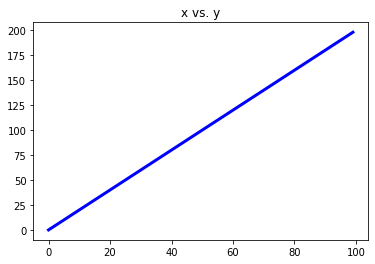

In [3]:
plt.plot(x, y, color = 'blue', linewidth=3)
plt.title('x vs. y')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

Text(0.5, 1.0, 'x vs. z')

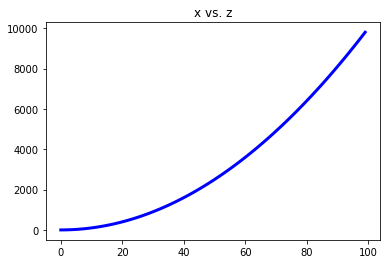

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, z, color = 'blue', linewidth=3)
ax.set_title('x vs. z')

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'z')

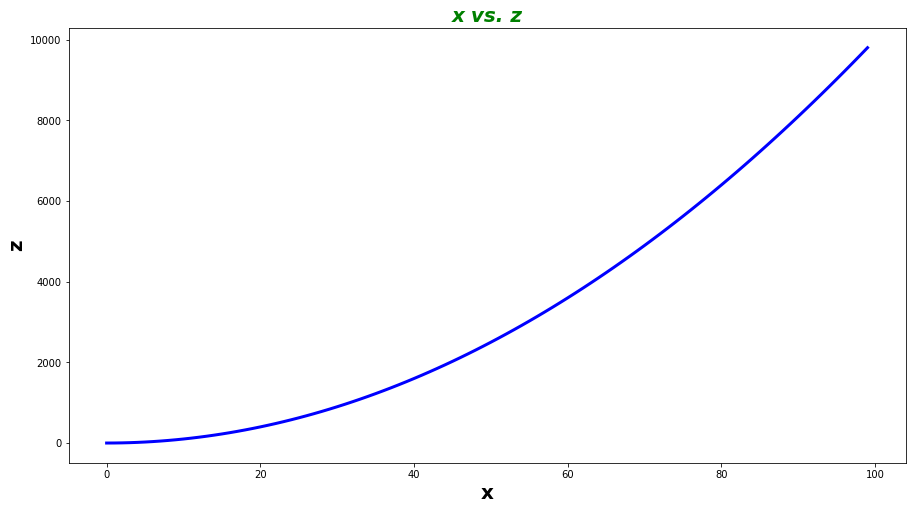

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
ax.plot(x, z, color = 'blue', linewidth=3)
ax.set_title('x vs. z', fontsize=20, fontweight='bold', color='green', style='italic')
plt.xlabel('x', fontsize=20, fontweight='bold')
plt.ylabel('z', fontsize=20, fontweight='bold')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [6]:
y1 = np.power(x, 2)
y2 = np.exp(x)

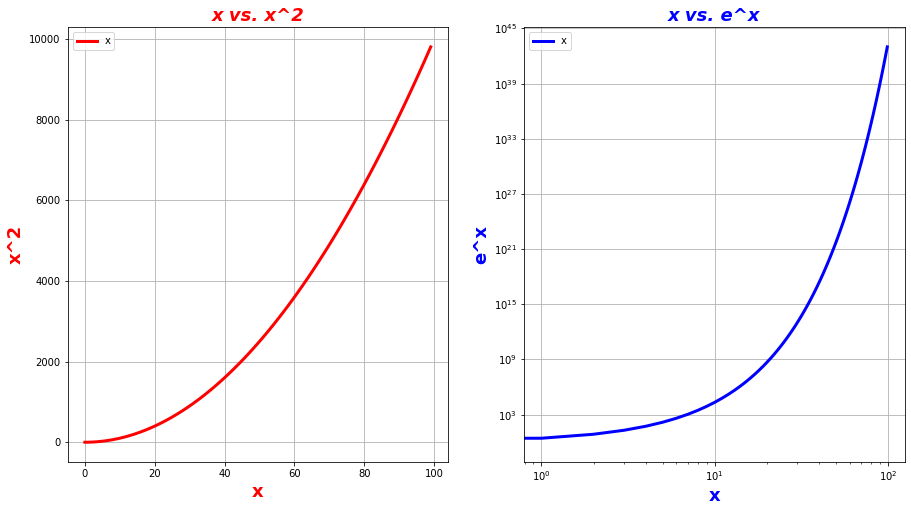

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
ax1.plot(x, y1, color='red', linewidth=3)
ax1.legend("x",loc="upper left")
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_title('x vs. x^2', fontsize=18, fontweight='bold', color='red', style='italic')
ax1.set_xlabel('x', fontsize=18, fontweight='bold', color='red')
ax1.set_ylabel('x^2', fontsize=18, fontweight='bold', color='red')
ax1.grid(True)

ax2.plot(x, y2, color='blue', linewidth=3)
ax2.legend("x",loc="upper left")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('x vs. e^x', fontsize=18, fontweight='bold', color='blue', style='italic')
ax2.set_xlabel('x', fontsize=18, fontweight='bold', color='blue')
ax2.set_ylabel('e^x', fontsize=18, fontweight='bold', color='blue')
ax2.grid(True)


#### As a bonus challenge, try to add a legend to the plot.

In [8]:
# legends were added to the plot in the line above.

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
driver = 'mysql+pymysql'
user = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
ip = '34.65.10.136'
database = 'fitbit'

conn_string = f'{driver}://{user}:{password}@{ip}/{database}'
conn = sqlalchemy.create_engine(conn_string)

In [10]:
fitbit = pd.read_sql_query('SELECT * FROM fitbit.fitbit2;', conn)
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.40389115,Friday,4,1,6.4,92.0863309353,0,0,May,5
1,2015-05-09,3631,18925,14.11,4,611,316,61,60,2248,...,8.76754481,Saturday,5,0,7.56666666667,92.4643584521,6.4,92.0863309353,May,5
2,2015-05-10,3204,14228,10.57,1,602,226,14,77,1719,...,6.56789147,Sunday,6,0,6.45,88.7614678899,7.56666666667,92.4643584521,May,5
3,2015-05-11,2673,6756,5.02,8,749,190,23,4,9620,...,3.11928242,Monday,0,1,5.18333333333,88.8571428571,6.45,88.7614678899,May,5
4,2015-05-12,2495,502,3.73,1,876,171,0,0,7360,...,2.31771383,Tuesday,1,1,6.78333333333,82.8920570265,5.18333333333,88.8571428571,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [11]:
steps_months_encoded = fitbit['Steps'].groupby(fitbit['Months_encoded']).median()
steps_work_or_weekend = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median()

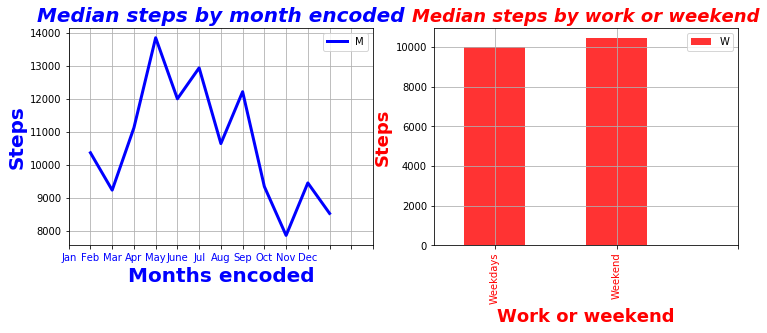

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plt.sca(ax1)
steps_months_encoded.plot(kind = 'line', color = 'blue', linewidth=3)
plt.legend("Months",loc="upper right")
plt.xticks(range(15), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], color='blue')
plt.title('Median steps by month encoded', fontsize=20, fontweight='bold', color='blue', style='italic')
plt.xlabel('Months encoded', fontsize=20, fontweight='bold', color='blue')
plt.ylabel('Steps', fontsize=20, fontweight='bold', color='blue')
plt.grid(True)

plt.sca(ax2)
steps_work_or_weekend.plot(kind = 'bar', alpha = 0.8, color='red')
plt.legend("Week",loc="upper right")
plt.xticks(range(3), ['Weekdays', 'Weekend'], color='red')
plt.title('Median steps by work or weekend', fontsize=18, fontweight='bold', color='red', style='italic')
plt.xlabel('Work or weekend', fontsize=18, fontweight='bold', color='red')
plt.ylabel('Steps', fontsize=18, fontweight='bold', color='red')
plt.grid(True)

plt.savefig('Median steps by month encoded & Median steps by work or weekend Vs. Steps.jpg')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

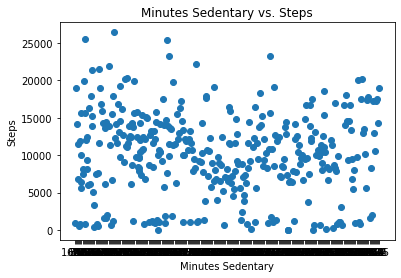

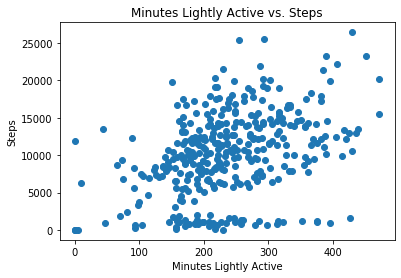

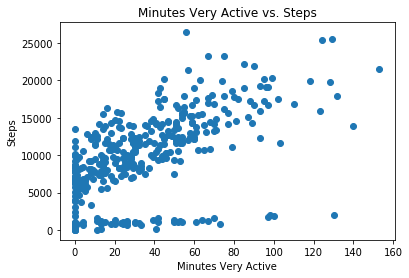

In [13]:
x = ['Minutes Sedentary', 'Minutes Lightly Active','Minutes Very Active']
y= fitbit['Steps']
for variable in x:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(fitbit[variable], y)
    ax.set_xlabel(variable)
    ax.set_ylabel('Steps')
    ax.set_title(f"{variable} vs. Steps")
    plt.savefig(f"{variable} vs. Steps.jpg")
    plt.show()    

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [14]:
driver = 'mysql+pymysql'
user = 'data-students'
password = 'iR0nH@cK-D4T4B4S3'
ip = '34.65.10.136'
database = 'titanic'

conn_string = f'{driver}://{user}:{password}@{ip}/{database}'
conn = sqlalchemy.create_engine(conn_string)

In [15]:
titanic = pd.read_sql_query('SELECT * FROM titanic.titanic;', conn)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [16]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [17]:
# NUMERICAL VARIABLES
titanic.select_dtypes(exclude=object).dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [18]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(exclude=['int64','float']).dtypes

Name        object
Gender      object
Ticket      object
Cabin       object
Embarked    object
dtype: object

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [19]:
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12,6)

#### Use the right visulalization to show the distribution of column `Age`.

Text(0.5, 1.0, 'Age distribution')

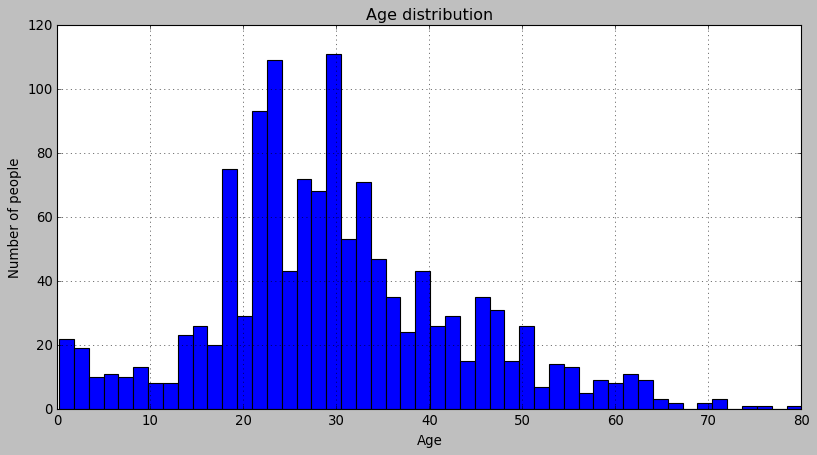

In [20]:
titanic['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age distribution')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

Text(0.5, 1.0, '50 bins')

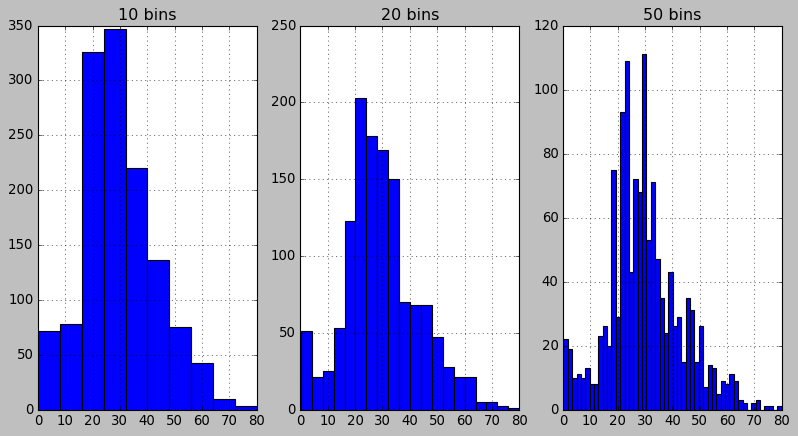

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.sca(ax1)
titanic['Age'].hist(bins=10)
plt.title('10 bins')
plt.sca(ax2)
titanic['Age'].hist(bins=20)
plt.title('20 bins')
plt.sca(ax3)
titanic['Age'].hist(bins=50)
plt.title('50 bins')

#### How does the bin size affect your plot?

In [22]:
"""
The more the number of bins the clearer the data becomes.
"""

'\nThe more the number of bins the clearer the data becomes.\n'

#### Use seaborn to show the distribution of column `Age`.

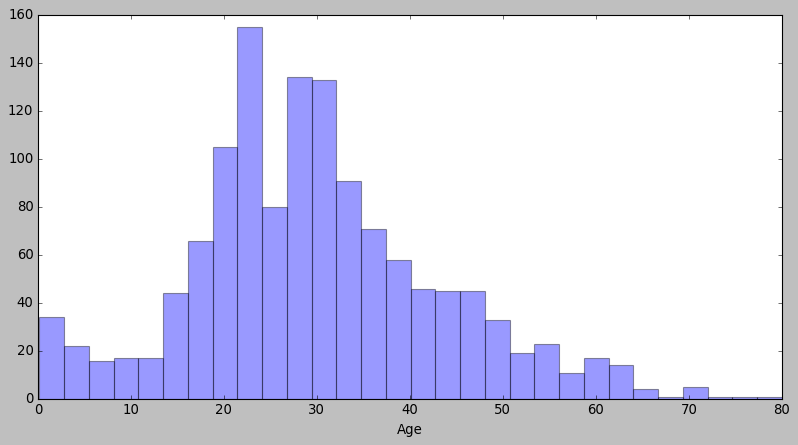

In [23]:
sns.distplot(titanic['Age'], kde = False)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'Count')

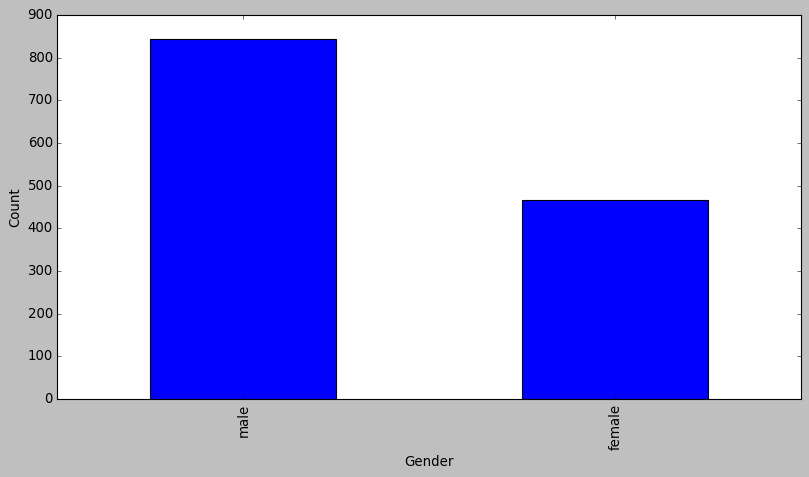

In [24]:
titanic['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')

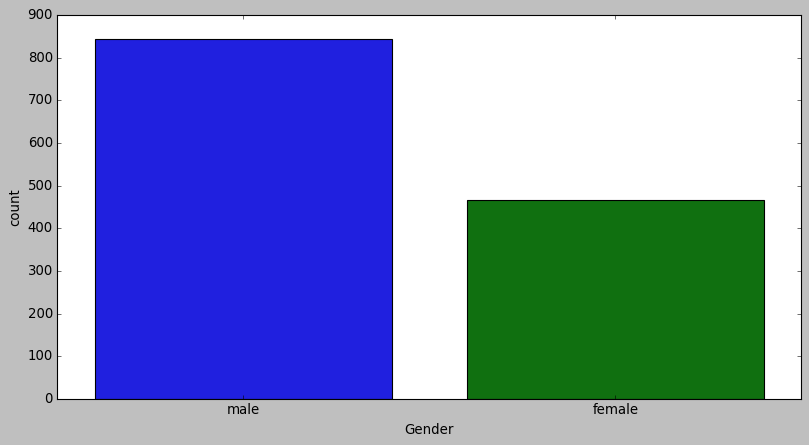

In [25]:
sns.countplot(x="Gender", data=titanic)

#### Use the right plot to visualize the column `Pclass`.

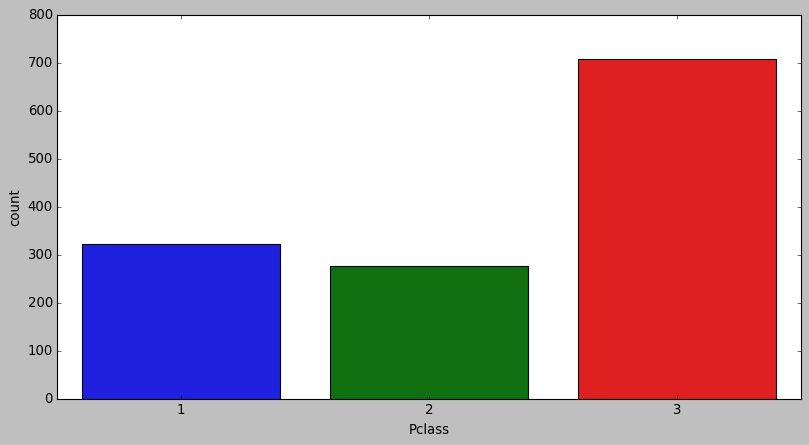

In [26]:
sns.countplot(x="Pclass", data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

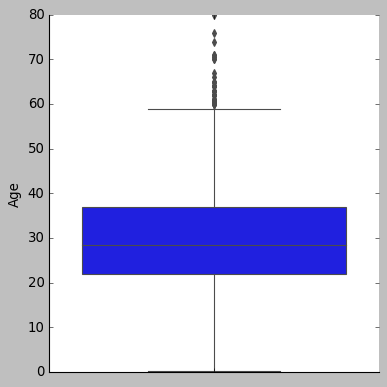

In [27]:
#sns.boxplot(y="Age", data=titanic)
sns.catplot(y="Age", kind="box", data=titanic)

In [28]:
"""
After doing some research (google), found that the best way to present summary statistics in a plot is by using boxplot,
as it shows information about the median, the interquartile range and the min/max of our data.
"""

'\nAfter doing some research (google), found that the best way to present summary statistics in a plot is by using boxplot,\nas it shows information about the median, the interquartile range and the min/max of our data.\n'

#### What does the last plot tell you about the feature `Age`?

In [29]:
"""
From the plot above we can see that the median age is around 28 / 29 years old.
And that the interquartile range is almost from 23 to 37 years old.
we can also see that the min age is zero and the maximum age is around 59 years.
And that there are some outliersfrom age 60 to 80 years.
"""

'\nFrom the plot above we can see that the median age is around 28 / 29 years old.\nAnd that the interquartile range is almost from 23 to 37 years old.\nwe can also see that the min age is zero and the maximum age is around 59 years.\nAnd that there are some outliersfrom age 60 to 80 years.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

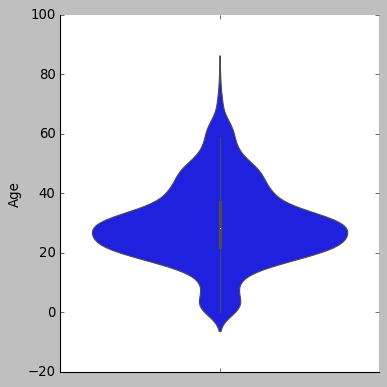

In [30]:
sns.catplot(y="Age", kind="violin", data=titanic)

#### What additional information does the last plot provide about feature `Age`?

In [31]:
"""
Violin Plot:
This plot is used to visualize the distribution of the data and its probability density.
This chart is a combination of a Box Plot and a Density Plot.
It is mainly used to find the frequency distribution along with box plot.
"""

'\nViolin Plot:\nThis plot is used to visualize the distribution of the data and its probability density.\nThis chart is a combination of a Box Plot and a Density Plot.\nIt is mainly used to find the frequency distribution along with box plot.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

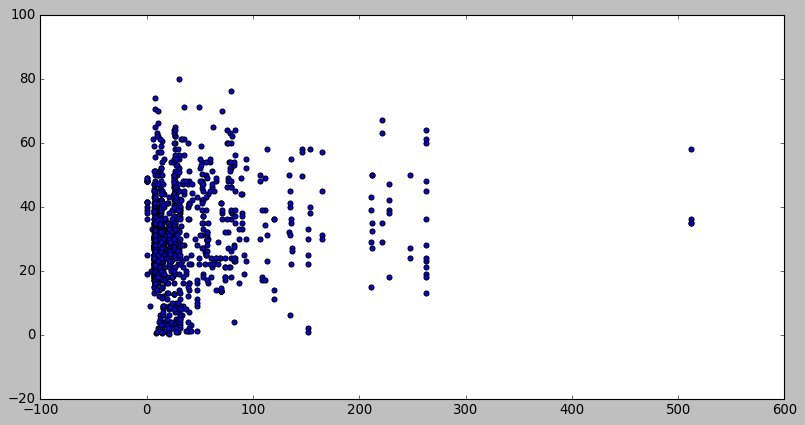

In [32]:
plt.scatter(titanic["Fare"], titanic["Age"])

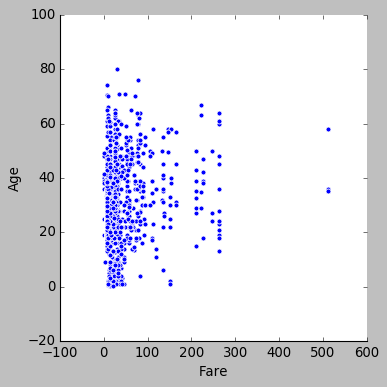

In [33]:
sns.relplot(x="Fare", y="Age", data=titanic)

#### Plot the correlation matrix using seaborn.

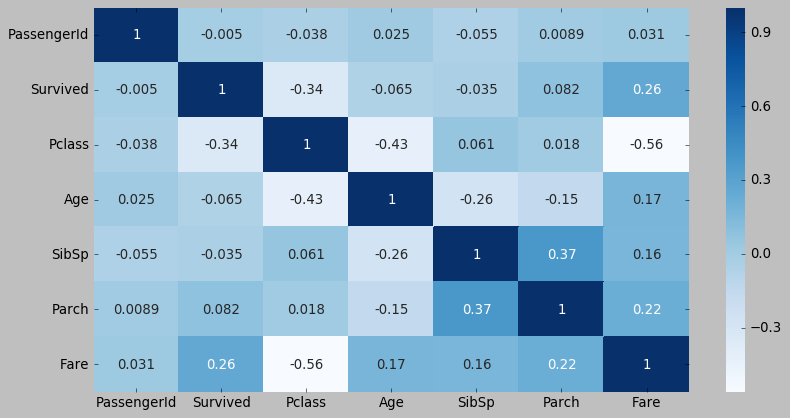

In [34]:
A = titanic.corr()
sns.heatmap(A, annot=True, cmap='Blues')

#### What are the most correlated features?

In [35]:
"""
The most correlated columns on the dataframs are SibSp & Parch, with a correlation of (0.37)
"""

'\nThe most correlated columns on the dataframs are SibSp & Parch, with a correlation of (0.37)\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

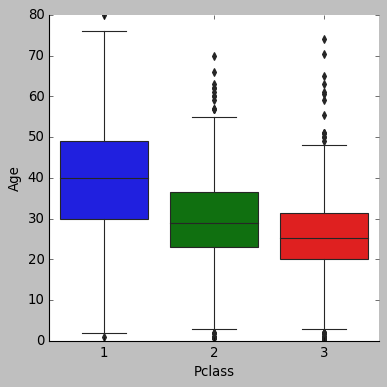

In [36]:
sns.catplot(x="Pclass", y="Age", kind="box", data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

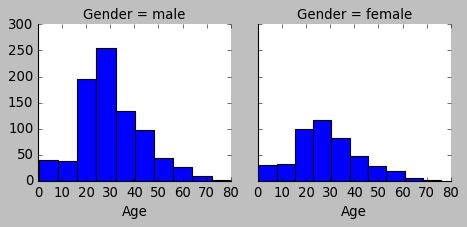

In [37]:
# I tried a lot and at the end I found out that I have to put the Gender in sns.FacetGrid function as a column, not the Age
g = sns.FacetGrid(titanic, col="Gender")
g.map(plt.hist, "Age");